In [3]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
 #_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
 #path_to_zip = tf.keras.utils.get_file('/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/cats_and_dogs.zip', origin=_URL, extract=True)


In [5]:
 #PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs.zip')
 #PATH
#New_PATH="/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/cats_and_dogs"
#!unzip $PATH -d $New_PATH

In [6]:
dataPath="/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered"
dataPath


'/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered'

In [7]:
! ls $dataPath

train  validation  vectorize.py


In [8]:
train_dir = os.path.join(dataPath,'train')
validation_dir = os.path.join(dataPath,'validation')

In [9]:
train_dir

'/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/cats_and_dogs/cats_and_dogs_filtered/train'

In [10]:
train_cats_dir = os.path.join(train_dir,'cats') # Directory with our training cat pics
train_dogs_dir = os.path.join(train_dir,'dogs') # Directory with our training dogs pics
validation_cats_dir = os.path.join(validation_dir,'cats') # Directory with validation cats pics
validation_dogs_dir = os.path.join(validation_dir,'dogs') # Directory with validation dogs pics

In [11]:
num_cat_tr =  len(os.listdir(train_cats_dir))
num_dog_tr =  len(os.listdir(train_dogs_dir))
num_cat_val =  len(os.listdir(validation_cats_dir))
num_dog_val =  len(os.listdir(validation_dogs_dir))

total_train = num_cat_tr + num_dog_tr
total_val = num_cat_val + num_dog_val

In [12]:
print('total training cat images :',num_cat_tr)
print('total training dog images :',num_dog_tr)
print("=======================================")
print('total validation cat images :',num_cat_val)
print('total validation dog images :',num_dog_val)
print("=======================================")
print(f"total training images : {total_train}")
print(f"total validation images : {total_val}")

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total training images : 2000
total validation images : 1000


In [13]:
batch_size = 128 # power of 2 --> 64,128,256,512
epochs=30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255) #generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) #generator for our validation data

In [15]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


In [16]:
validation_data_gen= validation_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = validation_dir,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 1000 images belonging to 2 classes.


In [17]:
sample_training_images, check = next(train_data_gen)

In [18]:
len(sample_training_images)

128

In [19]:
check

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [20]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [21]:
sample_training_images[4]

array([[[0.20392159, 0.14509805, 0.16470589],
        [0.09411766, 0.07058824, 0.08627451],
        [0.03137255, 0.02745098, 0.04705883],
        ...,
        [0.1137255 , 0.0627451 , 0.09803922],
        [0.07450981, 0.03529412, 0.07843138],
        [0.05882353, 0.01960784, 0.0627451 ]],

       [[0.3019608 , 0.19607845, 0.22352943],
        [0.12156864, 0.04705883, 0.07058824],
        [0.05490196, 0.01176471, 0.03529412],
        ...,
        [0.09019608, 0.0509804 , 0.08235294],
        [0.05882353, 0.03921569, 0.06666667],
        [0.05490196, 0.03529412, 0.0627451 ]],

       [[0.39607847, 0.23137257, 0.27058825],
        [0.28235295, 0.15294118, 0.18823531],
        [0.16862746, 0.06666667, 0.10196079],
        ...,
        [0.09411766, 0.0509804 , 0.07450981],
        [0.09019608, 0.0509804 , 0.08235294],
        [0.15294118, 0.1137255 , 0.14509805]],

       ...,

       [[0.62352943, 0.41960788, 0.47058827],
        [0.7176471 , 0.3803922 , 0.4784314 ],
        [0.75294125, 0

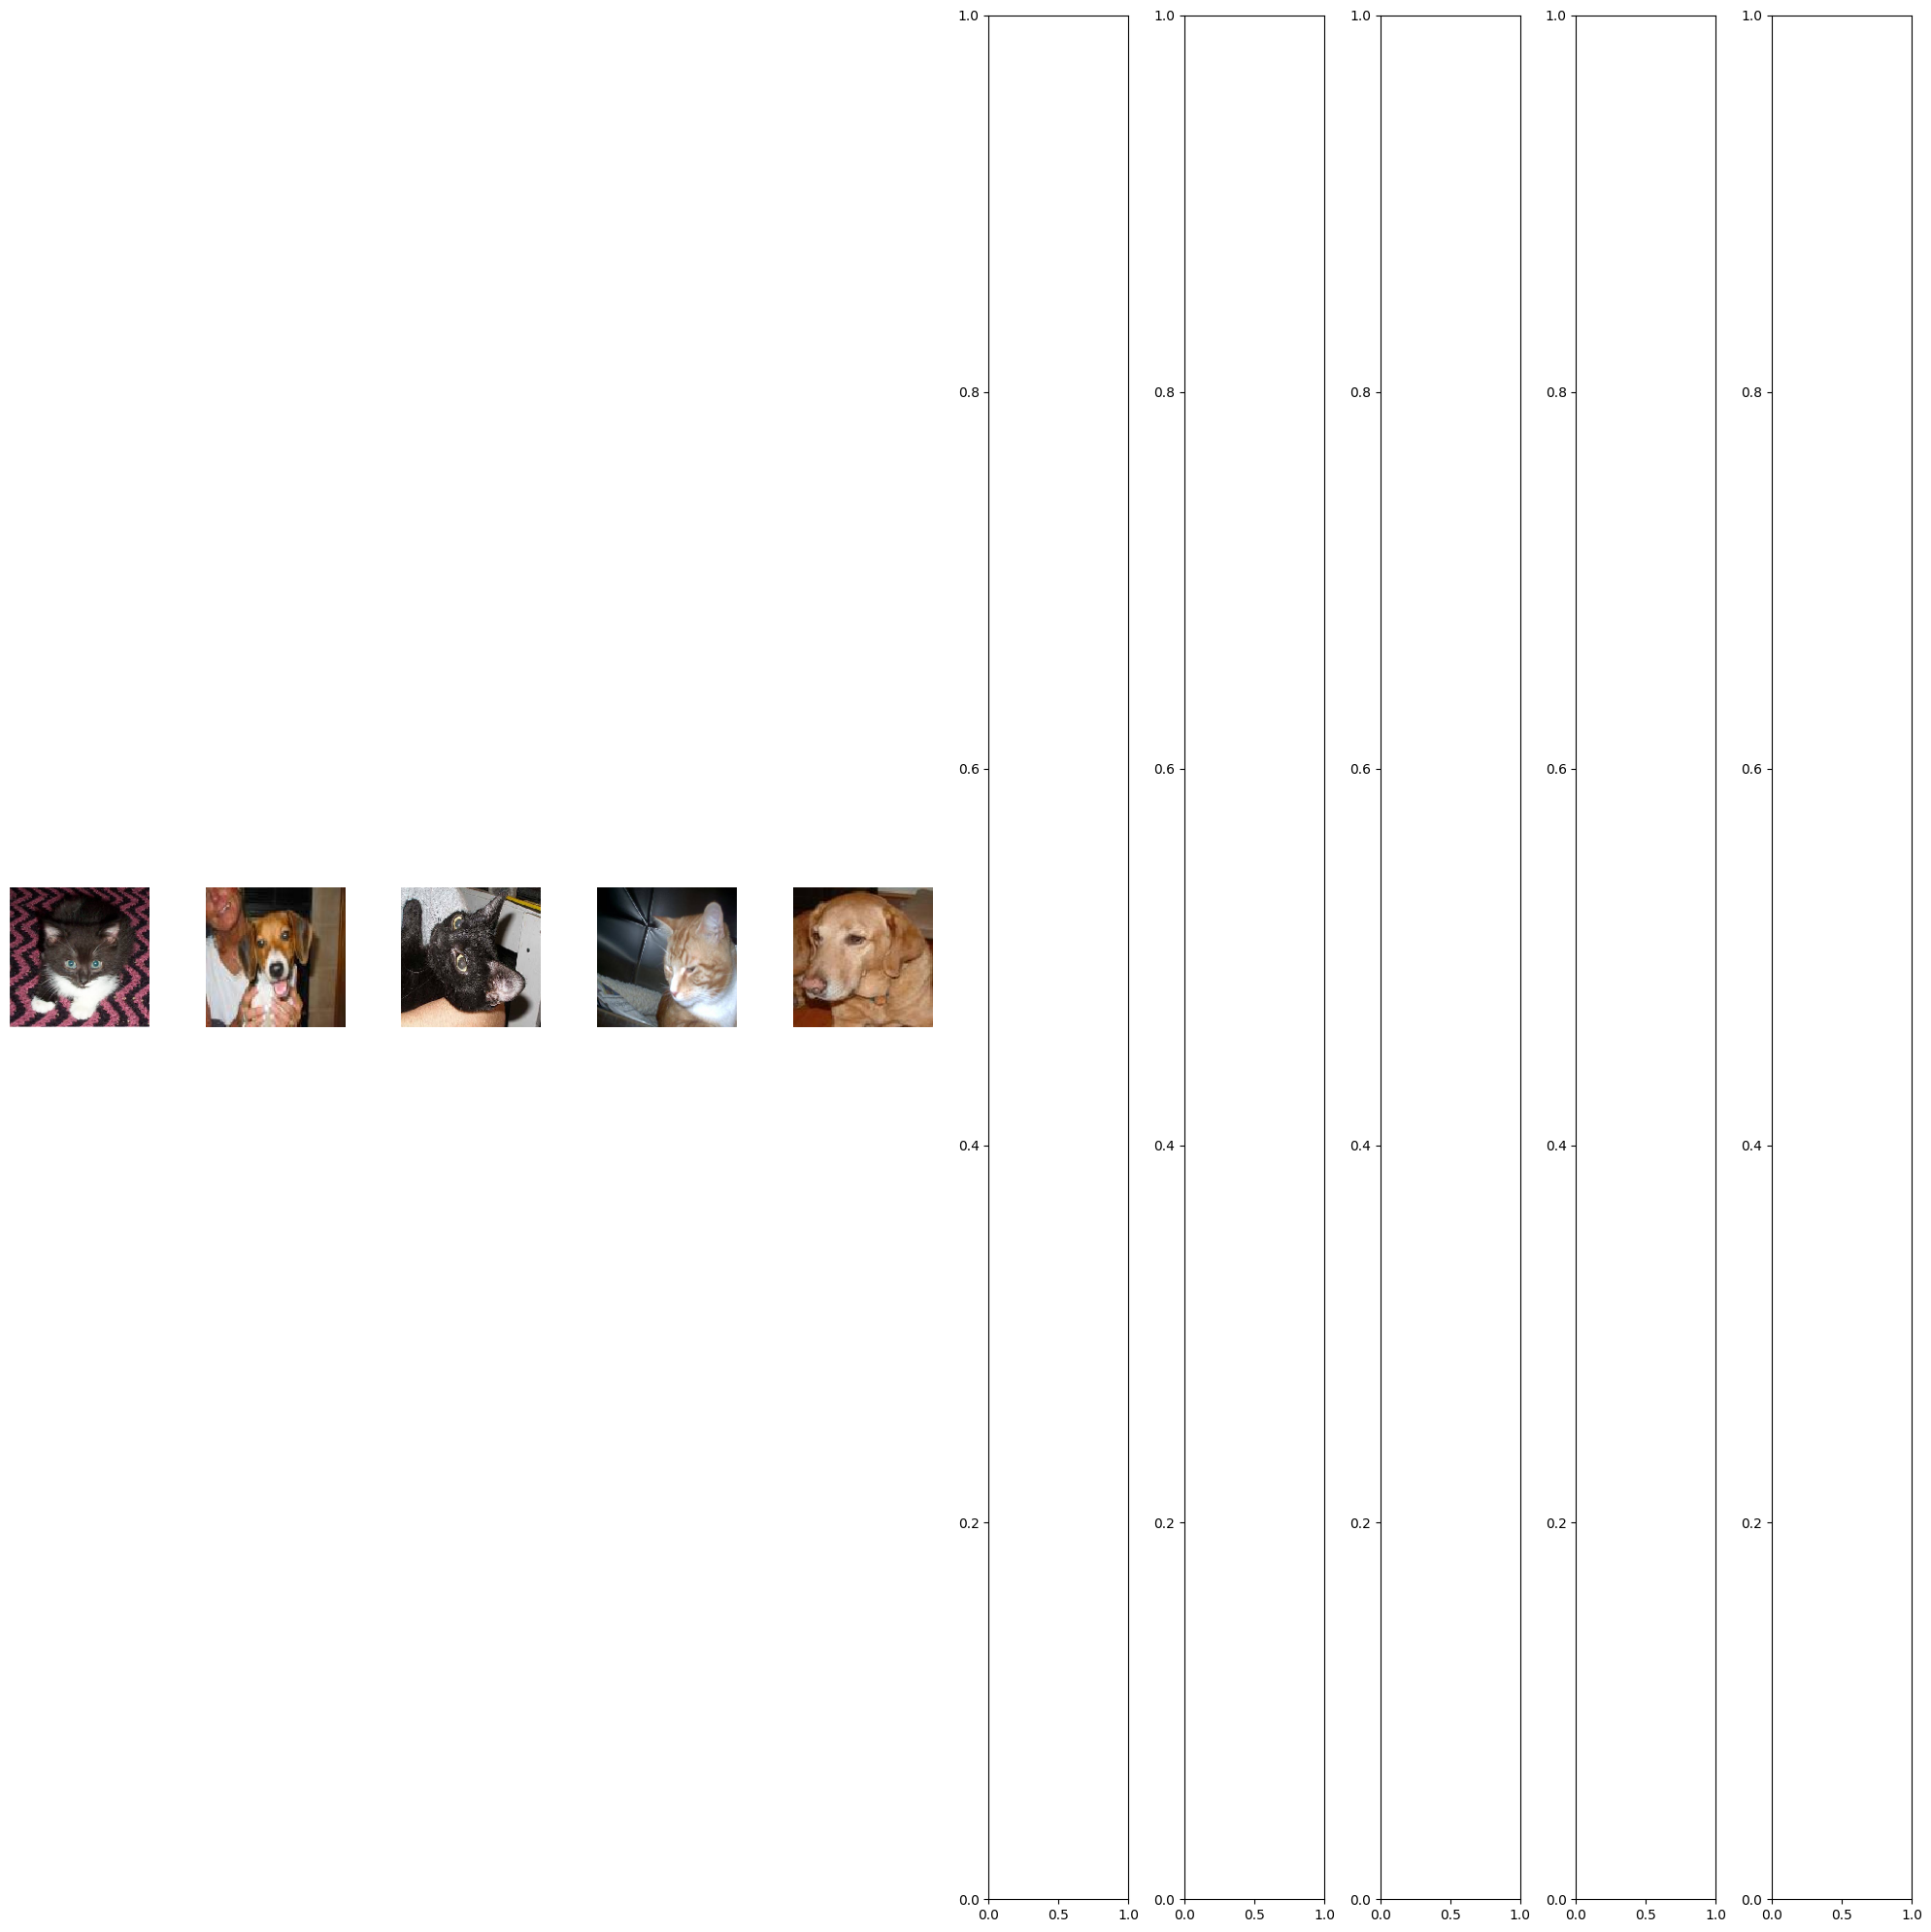

In [22]:
plotImages(sample_training_images[4:9])

In [23]:
# Let trains

model = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [26]:
2000//128

15

In [27]:
# Model fit

history = model.fit( train_data_gen,
                    steps_per_epoch=total_train//batch_size,
                    epochs=10,
                    validation_data=validation_data_gen,
                    validation_steps=total_val//batch_size

)

Epoch 1/10
15/15 [==============================] - 534s 36s/step - loss: 0.8546 - accuracy: 0.5294 - val_loss: 0.6900 - val_accuracy: 0.4967
Epoch 2/10
15/15 [==============================] - 9s 639ms/step - loss: 0.6759 - accuracy: 0.5198 - val_loss: 0.6632 - val_accuracy: 0.5179
Epoch 3/10
15/15 [==============================] - 11s 745ms/step - loss: 0.6362 - accuracy: 0.6058 - val_loss: 0.6760 - val_accuracy: 0.5469
Epoch 4/10
15/15 [==============================] - 11s 774ms/step - loss: 0.6018 - accuracy: 0.6640 - val_loss: 0.6279 - val_accuracy: 0.6161
Epoch 5/10
15/15 [==============================] - 9s 644ms/step - loss: 0.5704 - accuracy: 0.6827 - val_loss: 0.6491 - val_accuracy: 0.6038
Epoch 6/10
15/15 [==============================] - 11s 754ms/step - loss: 0.5134 - accuracy: 0.7297 - val_loss: 0.5726 - val_accuracy: 0.6920
Epoch 7/10
15/15 [==============================] - 9s 610ms/step - loss: 0.4474 - accuracy: 0.7826 - val_loss: 0.5929 - val_accuracy: 0.6696
Epo

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

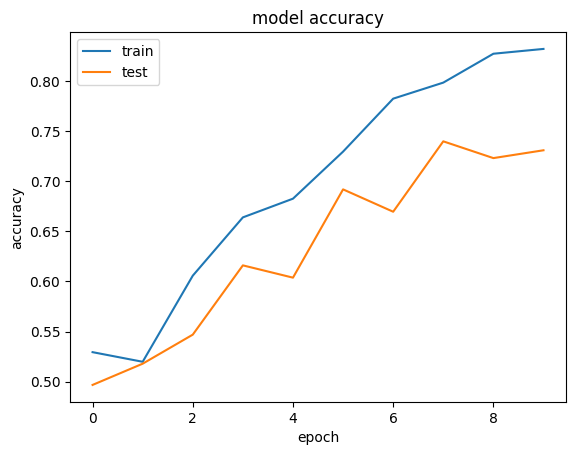

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

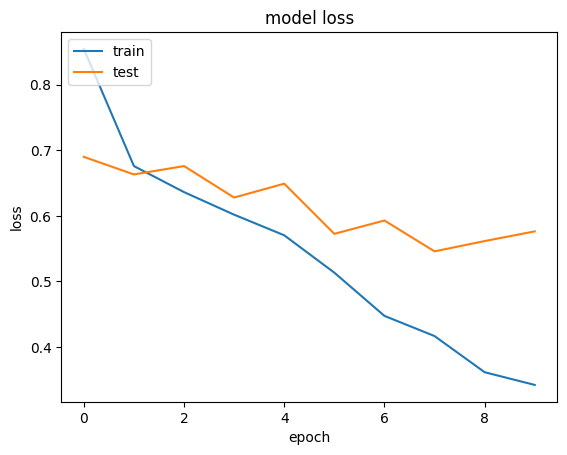

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
import math

def sigmoid(x):
  return 1/ (1+ math.exp(-x))
# Predict with new data
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/test/cat_1.jpg")

im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255
pred = model.predict([im])
pred =sigmoid(pred[0][0])
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")




1/1 [==============================] - 0s 191ms/step
cat


In [33]:
# Saving the model

model.save("/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/catVSdog_clf.h5")


In [34]:
from keras.models import load_model

model_h5 = load_model("/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/catVSdog_clf.h5")

In [36]:
import math

def sigmoid(x):
  return 1/ (1+ math.exp(-x))
# Predict with new data
img_size=(150,150)

from PIL import Image
import numpy as np

im = Image.open("/content/drive/MyDrive/Luminar_Projects/AI/Deep_Learning/CNN/test/cat_1.jpg")
im = im.resize(img_size)
im = np.expand_dims(im,axis=0)
im = np.array(im)
im = im/255
pred = model_h5.predict([im])
pred =sigmoid(pred[0][0])
if pred >=0.5:
  prediction='dog'
  print("Dog")
else:
  prediction='cat'
  print("cat")



1/1 [==============================] - 0s 67ms/step
cat


In [37]:
 train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [38]:
## Data Augmentation


In [39]:
# 1. Horizontal Flip

train_images_horizontal = ImageDataGenerator(rescale=1./255,horizontal_flip=True)
train_images_horizontal_gen= train_images_horizontal.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


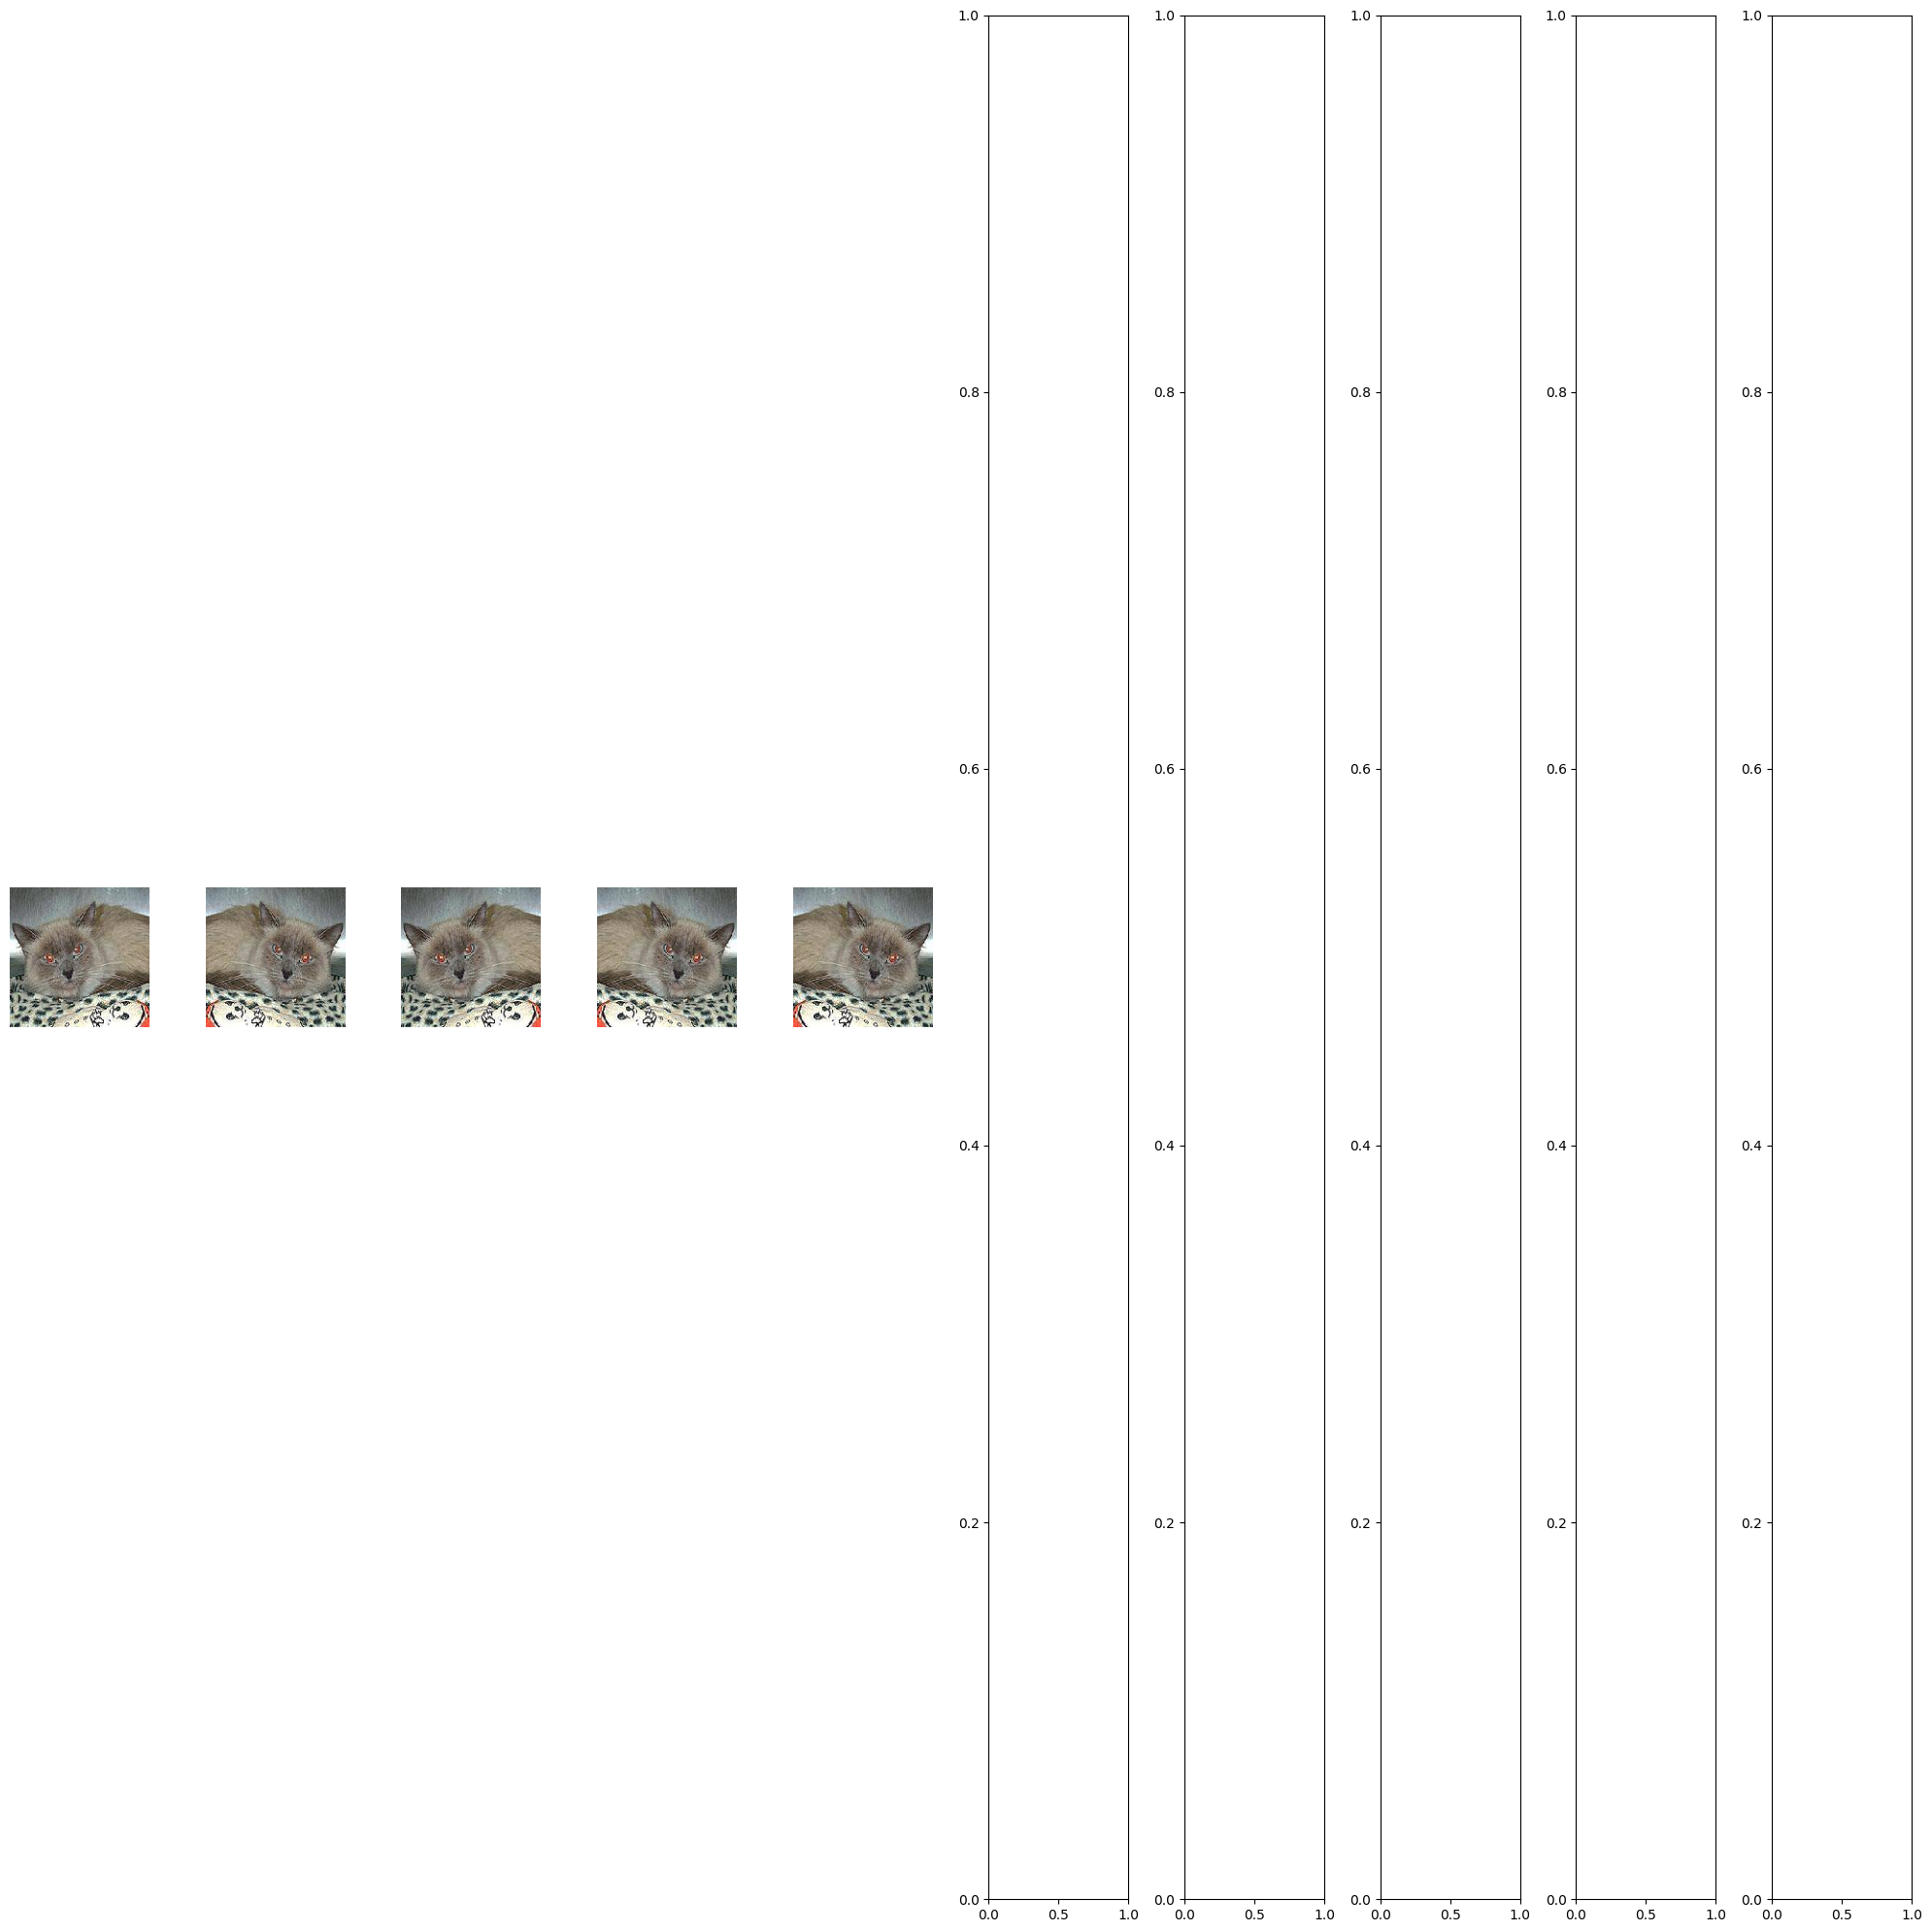

In [40]:
augmented_images = [train_images_horizontal_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


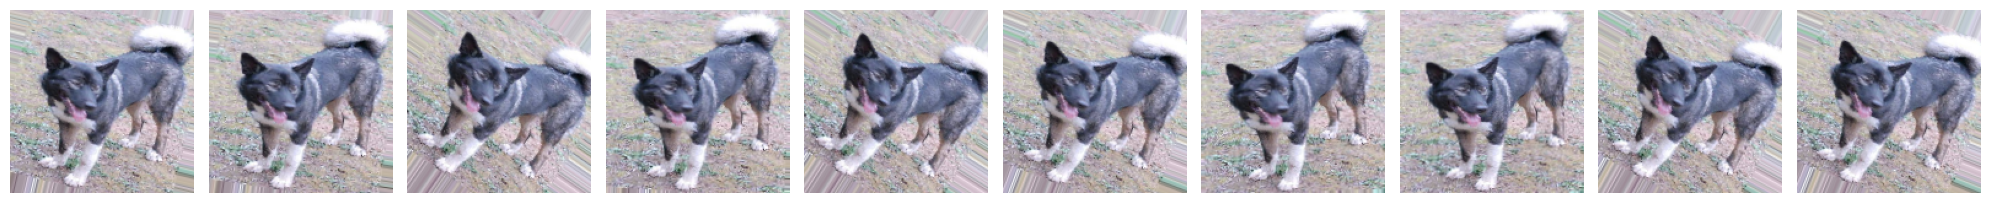

In [41]:
# 2. Rotate the image

train_images_rotation = ImageDataGenerator(rescale=1./255,rotation_range=45)
train_images_rotationl_gen= train_images_rotation.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_rotationl_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


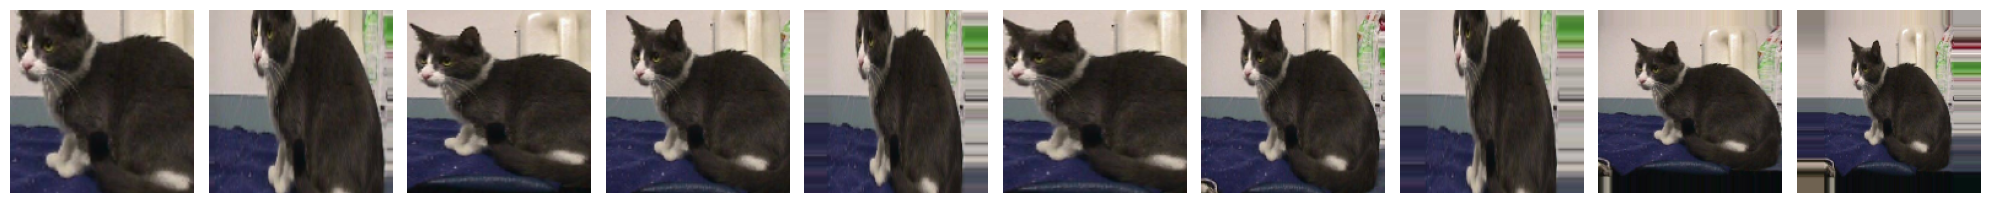

In [42]:
# 2. zoom the image

train_images_zoom = ImageDataGenerator(rescale=1./255,zoom_range=0.5)
train_images_zoom_gen= train_images_zoom.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

augmented_images = [train_images_zoom_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [43]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           horizontal_flip=True,
                                           zoom_range=0.5,
                                           width_shift_range=.15,
                                           height_shift_range=0.15) # generator for our training data

In [44]:
train_data_gen= train_image_generator.flow_from_directory( batch_size=batch_size,
                                          directory = train_dir,
                                          shuffle = True,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          class_mode='binary') # Multiclass ---> class_mode ="categorical"

Found 2000 images belonging to 2 classes.


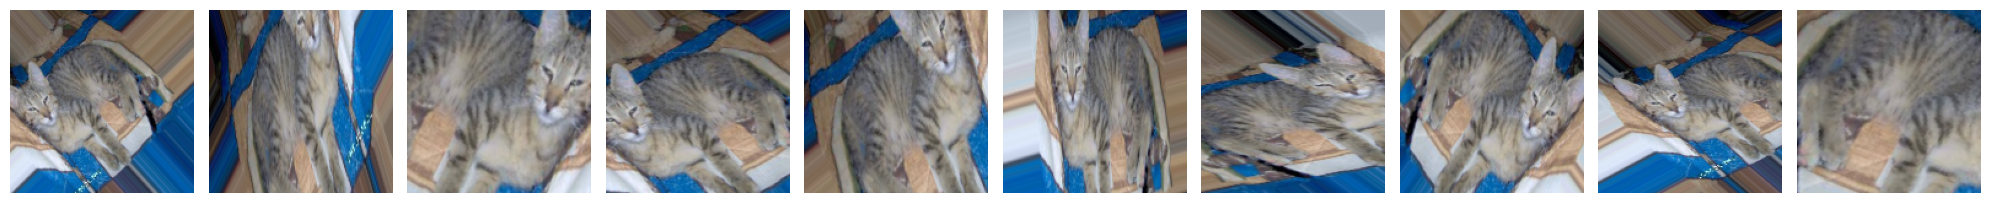

In [45]:
augmented_images = [train_data_gen[0][0][0] for i in range(10)]
plotImages(augmented_images)

In [46]:
#Let trains
# Dropout

model_new = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1)
])

In [47]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])


In [48]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 75, 75, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 37, 64)       

In [49]:
history = model_new.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=100,
    validation_data=validation_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/100
15/15 [==============================] - 23s 1s/step - loss: 1.3999 - accuracy: 0.5027 - val_loss: 0.6925 - val_accuracy: 0.4911
Epoch 2/100
15/15 [==============================] - 19s 1s/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6930 - val_accuracy: 0.5045
Epoch 3/100
15/15 [==============================] - 20s 1s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5033
Epoch 4/100
15/15 [==============================] - 21s 1s/step - loss: 0.6929 - accuracy: 0.4979 - val_loss: 0.6924 - val_accuracy: 0.4978
Epoch 5/100
15/15 [==============================] - 20s 1s/step - loss: 0.6918 - accuracy: 0.5005 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 6/100
15/15 [==============================] - 19s 1s/step - loss: 0.6899 - accuracy: 0.5000 - val_loss: 0.6882 - val_accuracy: 0.5022
Epoch 7/100
15/15 [==============================] - 21s 1s/step - loss: 0.6886 - accuracy: 0.5011 - val_loss: 0.6997 - val_accuracy: 0.4944
Epoch 8/100
1